In [1]:
import torch.nn as nn #Tao mang neuron
import pandas as pd
import torch
from torch.optim import Adam #Thuat toan toi uu hoa trong mo hinh
from torch.utils.data import Dataset, DataLoader
#Dataset cho phép bạn định nghĩa cách thức truy cập dữ liệu của bạn.

#DataLoader giúp bạn dễ dàng lấy dữ liệu theo lô, trộn và tối ưu hóa quá trình tải dữ liệu trong quá trình đào tạo mô hình.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##1 Loading the Data

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/LAB AI/Jupyter Notebook/mnist_train.csv.zip")
valid_df = pd.read_csv("/content/drive/MyDrive/LAB AI/Jupyter Notebook/mnist_test.csv.zip")

In [4]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
valid_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##2.Extracting the Labels

In [ ]:
y_train = train_df.pop("label")
y_valid = valid_df.pop("label")
y_train

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [ ]:
y_valid

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


##3. Extracting the Images

In [ ]:
x_train = train_df.values
x_valid = valid_df.values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_valid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_valid.shape

(10000, 784)

In [ ]:
y_valid.shape

(10000,)

##4.Visualizing the Data

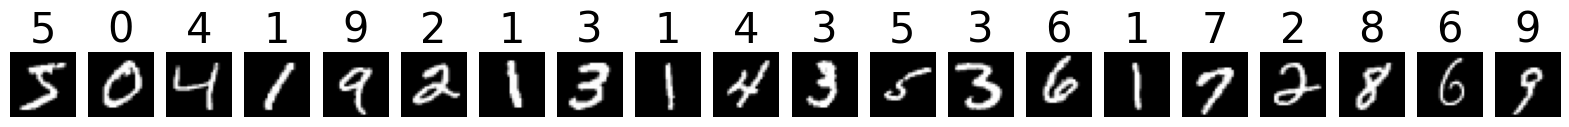

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))

num_images = 20
for i in range(num_images):
  row = x_train[i]
  label = y_train[i]

  image = row.reshape(28,28)
  plt.subplot(1,num_images,i+1)
  plt.title(label, fontdict = {'fontsize':30})
  plt.axis('off')
  plt.imshow(image, cmap = 'gray')

##5. Normalize the Image Data

In [ ]:
x_train.min()


0

In [ ]:
x_train.max()

255

In [ ]:
x_train = train_df.values/255
x_valid = valid_df.values/255

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##6.Custom Datasets

In [ ]:
#Datasets: init, getitem, len
class MyDataset(Dataset):
  def __init__(self, x_df, y_df):
    self.xs = torch.tensor(x_df).float().to(device)
    self.ys = torch.tensor(y_df).to(device)

  def __getitem__(self,idx):
    x = self.xs[idx]
    y = self.ys[idx]
    return x,y

  def __len__(self):
    return len(self.xs)

Working with Data Loader

In [ ]:
BATCH_SIZE = 32
train_data = MyDataset(x_train,y_train)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
train_N = len(train_loader.dataset)

In [ ]:
valid_data = MyDataset(x_valid, y_valid)
valid_loader = DataLoader(valid_data, batch_size = BATCH_SIZE)
valid_N = len(valid_loader)

In [ ]:
train_loader

In [ ]:
valid_loader

In [ ]:
batch = next(iter(train_loader))
batch

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([0, 5, 6, 7, 5, 9, 1, 9, 3, 7, 6, 7, 3, 7, 9, 0, 5, 3, 7, 2, 7, 6, 8, 5,
         8, 3, 4, 1, 3, 3, 9, 8], device='cuda:0')]

In [ ]:
batch[0].shape

torch.Size([32, 784])

In [ ]:
batch[1].shape

torch.Size([32])

##7. Build the Model

For this exercise we are going to build a sequential model. Just like last time, build a model that:

Has a flatten layer.
Has a dense input layer. This layer should contain 512 neurons amd use the relu activation function
Has a second dense layer with 512 neurons which uses the relu activation function
Has a dense output layer with neurons equal to the number of classes

In [ ]:
input_size = 28*28
n_classes = 24


In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size,512), #input
    nn.ReLU(), #Activation for input
    nn.Linear(512,512), #Hidden
    nn.ReLU(), #Activation for Hidden
    nn.Linear(512, n_classes) #Output
)

**1. model = nn.Sequential(...)**
Ý Nghĩa:
nn.Sequential cho phép bạn xây dựng một mạng nơ-ron bằng cách xếp chồng các lớp (layers) lại với nhau. Các lớp sẽ được thực hiện theo thứ tự mà bạn định nghĩa trong danh sách.

**2. nn.Flatten()**
Mục Đích:
Chuyển đổi đầu vào từ dạng tensor nhiều chiều (ví dụ: hình ảnh 28x28) thành một tensor 1 chiều.
Ví dụ, một hình ảnh 28x28 sẽ được biến thành một vector có 784 phần tử. Điều này là cần thiết để đưa vào các lớp tuyến tính.

**3. nn.Linear(input_size, 512)**
Mục Đích:
Tạo một lớp tuyến tính (fully connected layer) với input_size (784) đầu vào và 512 nơ-ron đầu ra.
Lớp này sẽ học các trọng số từ dữ liệu đầu vào và tạo ra các đầu ra cho lớp tiếp theo.

**4. nn.ReLU()**
Mục Đích:
Là hàm kích hoạt Rectified Linear Unit (ReLU). Hàm này sẽ được áp dụng cho đầu ra của lớp tuyến tính trước đó.
ReLU giúp mô hình học các đặc trưng phi tuyến tính và giảm thiểu vấn đề vanishing gradient.

**5. nn.Linear(512, 512)**
Mục Đích:
Tạo một lớp tuyến tính khác với 512 đầu vào và 512 đầu ra.
Đây là lớp ẩn (hidden layer), cho phép mô hình học các đặc trưng phức tạp hơn.

**6. nn.ReLU()**
Mục Đích:
Tương tự như trên, áp dụng hàm kích hoạt ReLU cho đầu ra của lớp ẩn trước đó.

**7. nn.Linear(512, n_classes)**
Mục Đích:
Tạo lớp đầu ra với 512 đầu vào (từ lớp ẩn trước đó) và n_classes đầu ra (số lượng lớp mà mô hình cần phân loại).
Mỗi nơ-ron trong lớp đầu ra sẽ đại diện cho một lớp trong bài toán phân loại.

**Tóm Tắt**
Mô Hình: Mô hình này là một mạng nơ-ron feedforward cơ bản với:
Một lớp đầu vào (Flatten + Linear).
Một lớp ẩn với 512 nơ-ron.
Một lớp đầu ra với n_classes nơ-ron.
Sử dụng hàm kích hoạt ReLU cho các lớp đầu vào và ẩn.

In [ ]:
model = torch.compile(model.to(device))
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=24, bias=True)
  )
)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())


##8.Traning the Model

**2.6.1 The Train Function**
This code is almost the same as in the previous notebook, but we no longer send x and y to our GPU because our DataLoader already does that.

Before looping through the DataLoader, we will set the model to model.train to make sure its parameters can be updated. To make it easier for us to follow training progress, we'll keep track of the total loss and accuracy.

Then, for each batch in our train_loader, we will:

1.Get an output prediction from the model

2.Set the gradient to zero with the optimizer's zero_grad function

3.Calculate the loss with our loss_function

4.Compute the gradient with backward

5.Update our model parameters with the optimizer's step function.

6.Update the loss and accuracy totals

In [ ]:
def train():
  loss = 0
  accuracy = 0

  model.train()
  for x, y in train_loader:
    output = model(x)
    optimizer.zero_grad()
    batch_loss = loss_function(output,y)
    batch_loss.backward()

    loss += batch_loss.item()
    accuracy += get_batch_accuracy(output,y,train_N)

  print("Train - Loss: {:.4f} Accuracy: {:.4f}".format(loss,accuracy))

## 9.The Validate Function

The model does not learn during validation, so the validate function is simpler than the train function above.

One key difference is we will set the model to evaluation mode with model.evaluate, which will prevent the model from updating any parameters.

In [ ]:
def validate():
  loss = 0
  accuracy = 0
  model.eval()
  with torch.no_grad():
    for x, y in valid_loader:
      output = model(x)
      loss += loss_function(output,y).item()
      accuracy += get_batch_accuracy(output,y,valid_N)

  print("Valid - Loss: {:.4f} Accuracy: {:.4f}".format(loss,accuracy))

##9. Calculating the Accuracy

Both the train and validate functions use get_batch_accuracy, but we have not defined that in this notebook yet.

The function below has three FIXMEs. Each one corresponds to the functions input arguments. Can you replace each FIXME with the correct argument?

It may help to view the documentation for argmax, eq, and view_as.

In [ ]:
def get_batch_accuracy(output,y,N):
  pred = output.argmax(dim = 1, keepdim = True)
  correct = pred.eq(y.view_as(pred)).sum().item()
  return correct/N

**Ý Nghĩa của FIXME**

**FIXME.argmax(dim=1, keepdim=True):**

Ý Nghĩa: Phần này cần một tensor (có thể là output) để áp dụng hàm argmax, nhằm tìm chỉ số của giá trị lớn nhất theo chiều (dim) 1. Điều này thường dùng để lấy dự đoán lớp từ đầu ra của mô hình.
Cần Sửa: Bạn cần thay FIXME bằng tensor chứa đầu ra của mô hình, có thể là output.

**pred.eq(FIXME.view_as(pred)):**
Ý Nghĩa: FIXME ở đây cũng cần một tensor tương ứng với kích thước của pred để so sánh các dự đoán với nhãn thực tế.
Cần Sửa: Thay FIXME bằng y, nhãn thực tế cho các mẫu trong batch.

**return correct / FIXME:**
Ý Nghĩa: Phần này cần một giá trị (có thể là N), đại diện cho tổng số mẫu trong batch để tính toán độ chính xác.
Cần Sửa: Thay FIXME bằng N để thực hiện phép chia đúng.

**Tóm Tắt**
FIXME trong đoạn code chỉ ra rằng có một số phần cần được hoàn chỉnh hoặc thay thế bằng các biến hoặc tensor phù hợp:
Dòng 1: Thay bằng output.
Dòng 2: Thay bằng y.
Dòng 3: Thay bằng N.

##10. The Training Loop

In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True
epochs = 20
for epoch in range(epochs):
  print("Epoch: {}".format(epoch))
  train()
  validate()

Epoch: 0
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 1
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 2
Train - Loss: 30008.1349 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 3
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 4
Train - Loss: 30008.1349 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 5
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 6
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 7
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 8
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 9
Train - Loss: 30008.1347 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accuracy: 1.3706
Epoch: 10
Train - Loss: 30008.1348 Accuracy: 0.0467
Valid - Loss: 5073.5206 Accu